# 형태소 분석

## [형태소](https://ko.wikipedia.org/wiki/%ED%98%95%ED%83%9C%EC%86%8C)
형태소(morpheme)는 언어학에서 (일반적인 정의를 따르면) 일정한 의미가 있는 가장 작은 말의 단위로 발화체 내에서 따로 떠어낼 수 있는 것을 말한다.
즉, 더 분석하면 뜻이 없어지는 말의 단위이다.

예) 한나가 책을 보았다.

### 형태소의 의미/기능으로 구분
- 실질형태소
  > 어휘적 의미가 있는 형태소로 어떤 대상이나 상태, 동작을 가리키는 형태소를 말한다. 일반적으로 명사, 동사, 형용사, 부사가 이에 속한다.
  > 위의 예에서는 "한나", "책", "보"가 이에 해당한다.
- 형식형태소
  > 문법적 의미가 있는 형태소로 어휘형태소와 함께 스여 그들 사이의 관계를 나타내는 기능을 하는 행태소를 말한다. 한국어에서는 조사, 어미가 이에 속한다.
  > 위의 예에서는 "가", "을", "았", "다"가 이에 해당한다.

### 형태소의 의존성으로 구분
- 자립형태소
    > 다른 형태소 없이 홀로 어절을 이루어 사용될 수 있는 형태소를 말한다. 한국어에서는 일반적으로 명사, 대명사, 수사, 관형사, 부사, 감탄사 등이 이에 속한다.
    > 위의 예에서는 "한나", "책"가 이에 해당한다.
- 의존형태소
    > 문장에서 반드시 다른 형태소와 함께 쓰여서 어절을 이루는 형태소를 말한다. 한국어에서는 조사와 어미는 물론 이에 속하고 용언의 어간 즉 동사, 형용사의 어간이 이에 속한다.
    > 위의 예에서는 "가", "을", "보", "았", "다"가 이에 해당한다.

## 형태소 분석기
형태소 분석기는 품사를 태깅해주는 (무슨 품사인지 마킹해주는)는 라이브러리입니다.
영어에서의 품사는 문장에서 위치나 말할 때 귾어 있는 띄어쓰기 단위로 되어 있기 때문에 POS(Part of Speech) tagger라고 합니다. 반면에 한국어에서는 단어를 다 잘라내야 제대로 형태소를 갈라낼 수 있어서 Morphology Analyzer라고 합니다.

예)
- 우리는 한국인이다 -> 우리(명사), 는(조사)
- We are Korean -> We(명사)

### [nltk](https://www.nltk.org/)
python에서 가장 오래되고 유명한 자연어 처리 라이브러리(한국어 미지원)

In [ ]:
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentence = """
At eight o'clock on Thursday morning
Arthur didn't feel very good."""

print(sentence)


At eight o'clock on Thursday morning
Arthur didn't feel very good.


토큰화

In [ ]:
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

문장속 단어에 품사를 적용하기

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

동사, 명사만

In [ ]:
lst = []

for token, pos in tagged:
  if pos.startswith("N") or pos.startswith("V"): # N: 명사, V: 동사
    lst.append(token)

In [ ]:
[ token for token, pos in tagged if pos.startswith("N") or pos.startswith("V") ]

["o'clock", 'Thursday', 'morning', 'Arthur', 'did', 'feel']

### [spacy](https://spacy.io/)
자연어 처리를 위한 python 기반의 오픈 소스 라이브러리

```shell
pip install spacy
python -m spacy download en
python -m spacy download ko_core_news_sm
```

#### 영어

In [ ]:
import spacy
from spacy.lang.en.examples import sentences

In [ ]:
sentences

['Apple is looking at buying U.K. startup for $1 billion',
 'Autonomous cars shift insurance liability toward manufacturers',
 'San Francisco considers banning sidewalk delivery robots',
 'London is a big city in the United Kingdom.',
 'Where are you?',
 'Who is the president of France?',
 'What is the capital of the United States?',
 'When was Barack Obama born?']

In [ ]:
# 모델 객체 생성
nlp = spacy.load("en_core_web_sm")

In [ ]:
sentences[0]

'Apple is looking at buying U.K. startup for $1 billion'

In [ ]:
# 문장 모델 적용(예측)
doc = nlp(sentences[0])

doc

Apple is looking at buying U.K. startup for $1 billion

In [ ]:
# 단어      / 품사
doc[0].text, doc[0].pos_

('Apple', 'PROPN')

In [ ]:
print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

Apple is looking at buying U.K. startup for $1 billion
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
Apple	Apple	PROPN	NNP	nsubj	Xxxxx	True	False
is	be	AUX	VBZ	aux	xx	True	True
looking	look	VERB	VBG	ROOT	xxxx	True	False
at	at	ADP	IN	prep	xx	True	True
buying	buy	VERB	VBG	pcomp	xxxx	True	False
U.K.	U.K.	PROPN	NNP	dobj	X.X.	False	False
startup	startup	NOUN	NN	dep	xxxx	True	False
for	for	ADP	IN	prep	xxx	True	True
$	$	SYM	$	quantmod	$	False	False
1	1	NUM	CD	compound	d	False	False
billion	billion	NUM	CD	pobj	xxxx	True	False


#### 한국어

In [ ]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [ ]:
!python -m spacy download ko_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 45.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from spacy.lang.ko.examples import sentences

In [ ]:
sentences

['애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.',
 '자율주행 자동차의 손해 배상 책임이 제조 업체로 옮겨 가다',
 '샌프란시스코 시가 자동 배달 로봇의 보도 주행 금지를 검토 중이라고 합니다.',
 '런던은 영국의 수도이자 가장 큰 도시입니다.']

In [ ]:
sentences[0]

'애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.'

In [ ]:
# 모델 생성
nlp = spacy.load("ko_core_news_sm")

# 형태소 분석
doc = nlp(sentences[0])

# 형태소 분석 결과 확인
print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

# for token in doc:
#     print(token.text, token.pos_, token.dep_)

애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
애플이	애플+이	NOUN	ncn+jxt	dislocated	xxx	True	False
영국의	영국+의	PROPN	nq+jcm	nmod	xxx	True	False
스타트업을	스타트업+을	NOUN	ncn+jcs	nsubj	xxxx	True	False
10억	10+억	NUM	nnc+nnc	compound	ddx	False	False
달러에	달러+에	ADV	nbu+jca	obl	xxx	True	False
인수하는	인수+하+는	VERB	ncpa+xsv+etm	acl	xxxx	True	False
것을	것+을	NOUN	nbn+jco	obj	xx	True	False
알아보고	알아보+고	AUX	pvg+ecx+px+ecx	ROOT	xxxx	True	False
있다	있+다	AUX	px+ef	aux	xx	True	False
.	.	PUNCT	sf	punct	.	False	False


In [ ]:
doc = nlp("아버지가방에들어가신다.")

# 형태소 분석 결과 확인
print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

아버지가방에들어가신다.
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
아버지가방에들어가신다	아버지가방에들어가신다	ADJ	paa+ef	ROOT	xxxx	True	False
.	.	PUNCT	sf	punct	.	False	False


In [ ]:
!python -m spacy download ko_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 MB 5.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# 모델 생성
nlp = spacy.load("ko_core_news_lg")

doc = nlp("아버지가 방에 들어가신다.")

# 형태소 분석 결과 확인
print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

아버지가 방에 들어가신다.
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
아버지가	아버지+가	NOUN	ncn+jcs	nsubj	xxxx	True	False
방에	방+에	ADV	ncn+jca	obl	xx	True	False
들어가신다	들어가신다	VERB	pvg+ef	ROOT	xxxx	True	False
.	.	PUNCT	sf	punct	.	False	False


### [Konlpy](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

Konlpy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았습니다.
- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  - http://semanticweb.kaist.ac.kr/hannanum/

- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  - http://kkma.snu.ac.kr/

- Komoran: 코모란. Shineware에서 개발.
  - https://github.com/shin285/KOMORAN

- Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  - https://bitbucket.org/eunjeon/mecab-ko

- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  - https://github.com/open-korean-text/open-korean-text

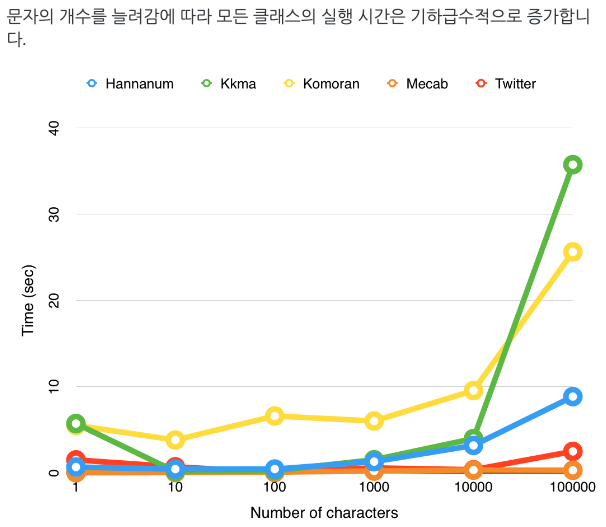

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git # 다운로드
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh # 소스를 실행

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 30.28 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.9 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-09-26 01:21:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.26, 104.192.142.25, 104.192.142.24, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

#### Okt(previous Twitter)

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

형태소 분석

In [ ]:
okt.pos(txt1)

[('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
okt.pos(txt2)

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
result = [] # 결과를 담을 수 있는 변수 선언
for token in okt.pos(txt2): # 형태소 분석 결과(데이터, 형태소)를 하나씩 검사하기
  if token[1][0] in 'NVJ': # 각각의 형태소 분석 결과(데이터, 형태소) 중 형태소 중 첫번째 글자가 명사(N), 동사(V), 조사(J)만 추출(필터링)
    result.append(token[0]) # 즉, 명사, 동사, 조사만 결과에 담기...

result

['아버지', '가', '방', '에', '들어가신다']

In [ ]:
[ token[0] for token in okt.pos(txt2) if token[1][0] in "NVJ" ] # 명사, 동사, 조사

['아버지', '가', '방', '에', '들어가신다']

명사만 분석

In [ ]:
okt.nouns(txt2)

['아버지', '방']

#### Mecab

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mec = Mecab()

In [ ]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

형태소 분석

In [ ]:
mec.pos(txt1)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

In [ ]:
mec.pos(txt2)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

In [ ]:
[ token[0] for token in mec.pos(txt1) if token[1][0] in "NVJ" ] # 명사, 동사, 조사

['아버지', '가', '방', '에', '들어가']

명사만 분석

In [ ]:
mec.nouns(txt1)

['아버지', '방']

### [kiwi(추천)](https://github.com/bab2min/Kiwi#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8)
- [품사태그정보](https://github.com/bab2min/Kiwi#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8)

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.8 MB/s eta 0:00:00
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.18.0-py3-none-any.whl size=34843380 sha256=064eb51195537933e248892ede88842d5ef78de077dbc992de7e5b39e1dcaa9e
  Stored in directory: /root/.cache/pip/wheels/0d/ea/f6/abb93f89cc196467624828ec9c29150c29a8399a589ba50bef
Successfully built kiwipiepy-model


In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [ ]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

In [ ]:
result1 = kiwi.analyze(txt1,top_n=3)
result1

[([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=4, len=1),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들어가', tag='VV', start=6, len=3),
   Token(form='시', tag='EP', start=9, len=1),
   Token(form='ᆫ다', tag='EF', start=9, len=2),
   Token(form='.', tag='SF', start=11, len=1)],
  -28.616201400756836),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가방', tag='NNG', start=3, len=2),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들어가', tag='VV', start=6, len=3),
   Token(form='시', tag='EP', start=9, len=1),
   Token(form='ᆫ다', tag='EF', start=9, len=2),
   Token(form='.', tag='SF', start=11, len=1)],
  -31.23125648498535),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가방', tag='NNG', start=3, len=2),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들', tag='VV', start=6, len=1),
   Token(form='어', tag='EC', start=7, len=1),
   To

In [ ]:
result2 = kiwi.analyze(txt2,top_n=3)
result2

[([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),
   Token(form='들어가', tag='VV', start=8, len=3),
   Token(form='시', tag='EP', start=11, len=1),
   Token(form='ᆫ다', tag='EF', start=11, len=2),
   Token(form='.', tag='SF', start=13, len=1)],
  -28.616201400756836),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),
   Token(form='들어가', tag='VV', start=8, len=3),
   Token(form='시', tag='EP', start=11, len=1),
   Token(form='ᆫ다', tag='EF', start=11, len=2),
   Token(form='.', tag='SF', start=13, len=1)],
  -28.616201400756836),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),


In [ ]:
[ token.form for token in  result1[0][0]]

['아버지', '가', '방', '에', '들어가', '시', 'ᆫ다', '.']

In [ ]:
result = kiwi.tokenize(txt1)
result

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=4, len=1),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='들어가', tag='VV', start=6, len=3),
 Token(form='시', tag='EP', start=9, len=1),
 Token(form='ᆫ다', tag='EF', start=9, len=2),
 Token(form='.', tag='SF', start=11, len=1)]

In [ ]:
tokens = [ (t.form , t.tag)   for t in result ]
tokens

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ᆫ다', 'EF'),
 ('.', 'SF')]

In [ ]:
[ token.form for token in result ]

['아버지', '가', '방', '에', '들어가', '시', 'ᆫ다', '.']

In [ ]:
[ token.form for token in result if token.tag[0] in "N" ] # 명사 추출

['아버지', '방']

In [ ]:
[ token.form for token in result if token.tag[0] in "V" ] # 동사 추출

['들어가']

In [ ]:
[ token.form for token in result if token.tag[0] in "NV" ] # 명사, 동사 추출

In [ ]:
txt_list = [txt1, txt2]
txt_list

['아버지가방에들어가신다.', '아버지가 방에 들어가신다.']

In [ ]:
result = kiwi.tokenize(txt_list)
result

In [ ]:
for tokens in result:
    print(tokens)

[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='가', tag='JKS', start=3, len=1), Token(form='방', tag='NNG', start=4, len=1), Token(form='에', tag='JKB', start=5, len=1), Token(form='들어가', tag='VV', start=6, len=3), Token(form='시', tag='EP', start=9, len=1), Token(form='ᆫ다', tag='EF', start=9, len=2), Token(form='.', tag='SF', start=11, len=1)]
[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='가', tag='JKS', start=3, len=1), Token(form='방', tag='NNG', start=5, len=1), Token(form='에', tag='JKB', start=6, len=1), Token(form='들어가', tag='VV', start=8, len=3), Token(form='시', tag='EP', start=11, len=1), Token(form='ᆫ다', tag='EF', start=11, len=2), Token(form='.', tag='SF', start=13, len=1)]


#### 불용어

- 불용어 적용

In [ ]:
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()

In [ ]:
result = kiwi.tokenize(txt_list, stopwords=stopwords) # 토큰화 & 불용어

for tokens in result:
    print(tokens)

[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='방', tag='NNG', start=4, len=1), Token(form='들어가', tag='VV', start=6, len=3), Token(form='시', tag='EP', start=9, len=1)]
[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='방', tag='NNG', start=5, len=1), Token(form='들어가', tag='VV', start=8, len=3), Token(form='시', tag='EP', start=11, len=1)]


- 불용어 리스트

In [ ]:
stopwords =  Stopwords()
stopwords.stopwords # 불용어 리스트

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),


- 불용어 추가

In [ ]:
stopwords.add("NLP")
stopwords.stopwords

{('NLP', 'NNP'),
 ('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP')

- 불용어 제거

In [ ]:
stopwords.remove(["NLP"])
stopwords.stopwords

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),


In [ ]:
txt2

'아버지가 방에 들어가신다.'

In [ ]:
stopwords.add(('방', 'NNG'))
stopwords.stopwords

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('방', 'NNG'),
 ('방', 'NNP'),
 ('방에', 'NNP'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),

In [ ]:
result = kiwi.tokenize(txt2, stopwords=stopwords)
result

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1)]

# 어휘집

- [torchtext ImportError in colab](https://stackoverflow.com/questions/65575871/torchtext-importerror-in-colab)

In [ ]:
!pip install -U torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [ ]:
from spacy.lang.en.examples import sentences

sentences

['Apple is looking at buying U.K. startup for $1 billion',
 'Autonomous cars shift insurance liability toward manufacturers',
 'San Francisco considers banning sidewalk delivery robots',
 'London is a big city in the United Kingdom.',
 'Where are you?',
 'Who is the president of France?',
 'What is the capital of the United States?',
 'When was Barack Obama born?']

## 형태소 분석기

In [ ]:
import spacy # 형태소 분석기

In [ ]:
nlp = spacy.load("en_core_web_sm") # 형태소 분석기 객체 생성

## 클래스를 이용한 어휘집 생성

In [ ]:
class Vocab:

  def __init__(self, sentences, tokenizer):
    # <pad> -> 문장의 길이가 다르기 때문에 문장의 길이를 통일 시키기 위한 토큰
    # <unk> -> unknown의 약어로 어휘집에 등록되지 않은 토큰을 표현하기 위한 토큰
    _word_list = ["<pad>","<unk>"]
    _tmp_list = []

    # 문장 리스트를 하나씩 뽑아서 토큰화 진행
    for text in sentences:
      # 문장 토큰화
      doc = tokenizer(text)
      # 추출 -> N(명사), V(동사), J(형용사)
      _tmp_list += [ token.lemma_ for token in doc if token.tag_[0] in "NVJ"]

    # set(_tmp_list) -> 중복 제거하는 함수
    # list(set(_tmp_list)) -> 리스트로 형변환
    _tmp_list = list(set(_tmp_list))
    _word_list += _tmp_list

    # 총 어휘집에 등록된 토큰의 수
    self._len_word = len(_word_list)
    # 어휘집 -> 문자를 입력하면 index 리턴
    self.word_dict = {w: i for i, w in enumerate(_word_list)}
    # 어휘집 -> index 입력하면 문자 리턴
    self.number_dict = {i: w for i, w in enumerate(_word_list)}

  # 문자를 입력하면 index 리턴
  def to_number(self, p_str):
    number = 0
    try:
      number = self.word_dict[p_str]
    except:
      number = self.word_dict["<unk>"]
    return number

  # index 입력하면 문자 리턴
  def to_word(self, p_int):
    word = None
    try:
      word = self.number_dict[p_int]
    except:
      word = self.number_dict[self.to_number("<unk>")]
    return word

  # 총 어휘집에 등록된 토큰의 수
  def __len__(self):
    return self._len_word

In [ ]:
# Vocab(문장리스트, 형태소 분석기)
vocab = Vocab(sentences, nlp)

In [ ]:
# 총 어휘집에 등록된 토큰의 수
# -> embedding 학습에 사용할 변수
len(vocab)

33

In [ ]:
vocab.word_dict

{'<pad>': 0,
 '<unk>': 1,
 'U.K.': 2,
 'London': 3,
 'France': 4,
 'Barack': 5,
 'buy': 6,
 'sidewalk': 7,
 'United': 8,
 'be': 9,
 'capital': 10,
 'States': 11,
 'shift': 12,
 'Apple': 13,
 'startup': 14,
 'consider': 15,
 'liability': 16,
 'insurance': 17,
 'robot': 18,
 'look': 19,
 'autonomous': 20,
 'delivery': 21,
 'Francisco': 22,
 'car': 23,
 'Kingdom': 24,
 'big': 25,
 'Obama': 26,
 'bear': 27,
 'ban': 28,
 'San': 29,
 'president': 30,
 'city': 31,
 'manufacturer': 32}

In [ ]:
vocab.number_dict

{0: '<pad>',
 1: '<unk>',
 2: 'U.K.',
 3: 'London',
 4: 'France',
 5: 'Barack',
 6: 'buy',
 7: 'sidewalk',
 8: 'United',
 9: 'be',
 10: 'capital',
 11: 'States',
 12: 'shift',
 13: 'Apple',
 14: 'startup',
 15: 'consider',
 16: 'liability',
 17: 'insurance',
 18: 'robot',
 19: 'look',
 20: 'autonomous',
 21: 'delivery',
 22: 'Francisco',
 23: 'car',
 24: 'Kingdom',
 25: 'big',
 26: 'Obama',
 27: 'bear',
 28: 'ban',
 29: 'San',
 30: 'president',
 31: 'city',
 32: 'manufacturer'}

In [ ]:
# 모델 학습용 -> embedding용
vocab.to_number("consider")

15

In [ ]:
# 모델 예측값(숫자)를 문자로 변환할 때 사용
vocab.to_word(22)

'Francisco'

- 스페셜 토큰

In [ ]:
# 어휘집에 없는 토큰이 들어오면, <unk>의 인덱스 값으로 리턴
vocab.to_number("안녕하세요^^")

1

In [ ]:
vocab.to_word(1)

'<unk>'

In [ ]:
vocab.to_word(0) # padding 토큰

'<pad>'

## torchtext를 이용한 어휘집 생성

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
# tokenizer -> 문장을 토큰화하는 함수
# -> 사용하고 싶은 형태소 분석기를 이용한 코드를 작성!!
def tokenizer(text):
    doc = nlp(text)
    return [ token.lemma_ for token in doc if token.tag_[0] in "NVJ"] # N(명사), V(동사), J(형용사)

In [ ]:
# 성공한 사람이 되려고 애쓰지 말고, 가치 있는 사람이 되려 애써라. -아인슈타인
tokenizer("Try not to become a man of success but rather try to become a man of value.")

['try', 'become', 'man', 'success', 'try', 'become', 'man', 'value']

- `yield`는 Python에서 `제너레이터(generator)`를 생성하기 위해 사용하는 키워드입니다. 제너레이터는 함수처럼 호출되지만, 호출될 때마다 하나의 값을 반환하고 함수의 상태를 유지하면서 멈춰있다가 다음 호출 시 그 다음 값을 반환합니다. 이를 통해 메모리 효율적으로 큰 데이터를 처리할 수 있습니다.

- 기본 개념
  - `yield` 키워드를 사용하면 함수가 제너레이터 함수가 됩니다.
  - 제너레이터 함수는 호출될 때 실행되지 않고, `next()` 함수를 통해 호출될 때마다 yield에 의해 반환된 값을 하나씩 돌려줍니다.
  - 제너레이터는 모든 값을 메모리에 저장하지 않고, 필요한 순간에 값을 생성하여 메모리 사용을 줄입니다.

In [ ]:
from tqdm.auto import tqdm

def yield_tokens(data:list, tokenizer):
    for text in tqdm(data):
        yield tokenizer(text)

In [ ]:
tmp_gen = yield_tokens(
    ["Try not to become a man of success but rather try to become a man of value."]
    , tokenizer  )

In [ ]:
next(tmp_gen)

  0%|          | 0/1 [00:00<?, ?it/s]

['try', 'become', 'man', 'success', 'try', 'become', 'man', 'value']

In [ ]:
# 제너레이터(generator) 생성
# -> 문장들을 토큰화하는 기능
gen = yield_tokens(sentences,tokenizer)

# build_vocab_from_iterator(제너레이터/이터레이터, specials토큰 정의)
# <pad> -> 문장의 길이가 다르기 때문에 문장의 길이를 통일 시키기 위한 토큰
# <unk> -> unknown의 약어로 어휘집에 등록되지 않은 토큰을 표현하기 위한 토큰
vocab = build_vocab_from_iterator(gen, specials=["<pad>","<unk>"])

# set_default_index() -> 어휘집에 등록되지 않은 토큰이 입력되면 실행되는 함수
vocab.set_default_index(vocab["<unk>"])

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
# 어휘집에 등록된 전체 토큰의 수
# -> embedding 학습을 진행할때 사용할 초기값
len(vocab)

33

In [ ]:
# 문자를 숫자(index)로 변환하는 기능
# -> embedding 학습을 할 때 사용할 기능
vocab(['Francisco', 'Barack', 'France'])

[7, 5, 6]

In [ ]:
# 숫자(index)를 문자로 변환하는 기능
# -> NLP Model의 예측값을 문자로 변환할 때 사용할 기능
vocab.lookup_tokens([7, 5, 6])

['Francisco', 'Barack', 'France']

- 스페셜 토큰 확인

In [ ]:
vocab(["<pad>","<unk>"])

[0, 1]

In [ ]:
vocab.lookup_tokens([0, 1, 0, 1])

['<pad>', '<unk>', '<pad>', '<unk>']

# Padding
- 문장의 길이가 서로 다르기 때문에 모든 문장의 길이를 통일 시켜야 함


1. 모든 문장들을 어휘집을 이용하여 토큰화 진행

In [ ]:
sentences

['Apple is looking at buying U.K. startup for $1 billion',
 'Autonomous cars shift insurance liability toward manufacturers',
 'San Francisco considers banning sidewalk delivery robots',
 'London is a big city in the United Kingdom.',
 'Where are you?',
 'Who is the president of France?',
 'What is the capital of the United States?',
 'When was Barack Obama born?']

In [ ]:
# 하나의 문장을 토큰화를 진행 -> 의미있는 단어(토큰)으로 나누자
tokenized_text = tokenizer(sentences[0])
tokenized_text

['Apple', 'be', 'look', 'buy', 'U.K.', 'startup']

In [ ]:
# 어휘집을 이용하여 토큰을 index 값으로 변경
tokenized_indexs = vocab(tokenized_text)
tokenized_indexs

[4, 2, 26, 18, 13, 32]

In [ ]:
# 어휘집을 이용하여 index를 토큰으로 변경
vocab.lookup_tokens(tokenized_indexs)

['Apple', 'be', 'look', 'buy', 'U.K.', 'startup']

In [ ]:
tokenized_sentences = [ vocab(tokenizer(text)) for text in sentences ]
tokenized_sentences

[[4, 2, 26, 18, 13, 32],
 [14, 20, 30, 24, 25, 27],
 [11, 7, 22, 15, 31, 23, 29],
 [9, 2, 17, 21, 3, 8],
 [2],
 [2, 28, 6],
 [2, 19, 3, 12],
 [2, 5, 10, 16]]

2. 모든 문장의 토큰 길이를 최대 문장의 토큰 길이로 통일 시켜야 하기 때문에 최대 문장의 토큰 길이 구하기
  - 각 문장의 길이 -> `len()`
  - 문장들 중 가장 긴 길이 -> `max()`

In [ ]:
tokenized_sentences[0]

[4, 2, 26, 18, 13, 32]

In [ ]:
len(tokenized_sentences[0])

6

In [ ]:
max(tokenized_sentences[0])

32

In [ ]:
# 각 문장의 길이
len_tokenized_sentences = [ len(tokenized_text) for tokenized_text in tokenized_sentences ]

# 문장들 중 가장 긴 길이
len_max = max(len_tokenized_sentences)
len_max

7

3. 패딩(스페셜 토큰)으로 추가하여 모든 문장의 토큰 길이를 최대 문장의 토큰 길이로 통일 시키자(패딩은 문자의 마지막에 추가하기)

In [ ]:
tokenized_sentences

[[4, 2, 26, 18, 13, 32],
 [14, 20, 30, 24, 25, 27],
 [11, 7, 22, 15, 31, 23, 29],
 [9, 2, 17, 21, 3, 8],
 [2],
 [2, 28, 6],
 [2, 19, 3, 12],
 [2, 5, 10, 16]]

In [ ]:
# 최대 토큰의 수보다 부족한 값 만큼 <pad>을 추가
# -> <pad> * 부족한 값
vocab(["<pad>"]) * 5

[0, 0, 0, 0, 0]

In [ ]:
# len_max - len(tokenized_text) -> 부족한 값
# vocab(["<pad>"]) * (len_max - len(tokenized_text)) -> 최대 토큰의 수보다 부족한 값 만큼 <pad>을 추가
add_padding_tokenized_sentences = [ tokenized_text + vocab(["<pad>"]) * (len_max - len(tokenized_text)) for tokenized_text in tokenized_sentences ]

add_padding_tokenized_sentences

[[4, 2, 26, 18, 13, 32, 0],
 [14, 20, 30, 24, 25, 27, 0],
 [11, 7, 22, 15, 31, 23, 29],
 [9, 2, 17, 21, 3, 8, 0],
 [2, 0, 0, 0, 0, 0, 0],
 [2, 28, 6, 0, 0, 0, 0],
 [2, 19, 3, 12, 0, 0, 0],
 [2, 5, 10, 16, 0, 0, 0]]

4. 검증하기
  - 최대 토큰 길이 == 최소 토큰 길이

In [ ]:
len_max

7

In [ ]:
len_max == min([ len(tmp) for tmp in add_padding_tokenized_sentences])

True

5. 토큰화 된 문장들을 어휘집을 이용하여 다시 문자로 변환

In [ ]:
add_padding_tokenized_sentences

[[4, 2, 26, 18, 13, 32, 0],
 [14, 20, 30, 24, 25, 27, 0],
 [11, 7, 22, 15, 31, 23, 29],
 [9, 2, 17, 21, 3, 8, 0],
 [2, 0, 0, 0, 0, 0, 0],
 [2, 28, 6, 0, 0, 0, 0],
 [2, 19, 3, 12, 0, 0, 0],
 [2, 5, 10, 16, 0, 0, 0]]

In [ ]:
add_padding_tokenized_sentences[0]

[4, 2, 26, 18, 13, 32, 0]

In [ ]:
vocab.lookup_tokens(add_padding_tokenized_sentences[0])

['Apple', 'be', 'look', 'buy', 'U.K.', 'startup', '<pad>']

In [ ]:
[
   ' '.join(vocab.lookup_tokens(tokenized)).replace("<pad>", "").strip() for tokenized in add_padding_tokenized_sentences
]

['Apple be look buy U.K. startup',
 'autonomous car shift insurance liability manufacturer',
 'San Francisco consider ban sidewalk delivery robot',
 'London be big city United Kingdom',
 'be',
 'be president France',
 'be capital United States',
 'be Barack Obama bear']

# 문제
- 네이버 리뷰 데이터를 이용하여 어휘집 및 Padding 진행

In [1]:
!pip install -U torchtext==0.15.2 kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.1 MB/s eta 0:00:00
   ━━━━

In [2]:
# 데이터 로드용
import numpy as np
import pandas as pd

# 토큰화에 필요한 모듈용
from kiwipiepy import Kiwi
from torchtext.vocab import build_vocab_from_iterator

# 진행바
from tqdm.auto import tqdm

## 데이터 로드

### 구글 드라이브 연결

In [3]:
from google.colab import drive

drive.mount("/content/data")

Mounted at /content/data


In [4]:
# 상수
DATA_PATH = "/content/data/MyDrive/ai_lecture/2. Deep Learning/3. NLP Pytorch/data/"

### 판다스를 이용하여 리뷰 데이터 로드

In [14]:
df_naver_reviews = pd.read_csv(DATA_PATH+"naver_review/naver_review_train.csv", sep="\t")
df_naver_reviews.shape

(150000, 3)

In [15]:
df_naver_reviews.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## Cleaning

### 필요없는 텍스트 제거

- 결측치 제거

In [16]:
df_naver_reviews['document'].isnull().sum()

5

In [17]:
df_naver_reviews.dropna(inplace=True)
print(df_naver_reviews.shape)
df_naver_reviews['document'].isnull().sum()

(149995, 3)


0

- 필요없는 텍스트 제거

In [18]:
df_naver_reviews.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [19]:
df_naver_reviews.tail()

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [21]:
df_naver_reviews['document'] = df_naver_reviews['document'].map(
    lambda x: x.replace("...", "").replace("..", "").replace(".", " "))

df_naver_reviews.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 앞뒤 공백 제거

In [22]:
df_naver_reviews['document'] = df_naver_reviews['document'].map(lambda x: x.strip())

df_naver_reviews.tail()

,id,document,label
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [23]:
df_naver_reviews.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 토큰화

### 형태소 분석기

In [24]:
kiwi = Kiwi()

- 불용어

In [25]:
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()

In [26]:
stopwords.add(('네이버', 'NNG'))

In [28]:
text = df_naver_reviews['document'][0]
text

'아 더빙 진짜 짜증나네요 목소리'

In [30]:
tokenized_text = kiwi.tokenize(text, stopwords=stopwords)
tokenized_text

[Token(form='아', tag='IC', start=0, len=1),
 Token(form='더빙', tag='NNG', start=2, len=2),
 Token(form='진짜', tag='MAG', start=5, len=2),
 Token(form='짜증', tag='NNG', start=8, len=2),
 Token(form='나', tag='VV', start=10, len=1),
 Token(form='네요', tag='EF', start=11, len=2),
 Token(form='목소리', tag='NNG', start=14, len=3)]

In [31]:
# 명사와 동사만 추출
[ token.form for token in tokenized_text if token.tag[0] in "NV" ]

['더빙', '짜증', '나', '목소리']

In [32]:
def tokenizer(text):
    tokenized_text = kiwi.tokenize(text, stopwords=stopwords)
    return [ token.form for token in tokenized_text if token.tag[0] in "NV" ]

In [33]:
tokenizer(text)

['더빙', '짜증', '나', '목소리']

### 어휘집

In [34]:
def yield_tokens(documents, tokenizer):
    for text in tqdm(documents, desc="tokenizer"):
        yield tokenizer(text)

In [35]:
# 토큰화를 진행할 객체 생성
gen = yield_tokens(df_naver_reviews['document'], tokenizer)

# 어휘집 생성
vocab = build_vocab_from_iterator(gen, specials=["<padding>", "<unknown>"])

# 만약 어휘집에 없는 토큰을 요청하면 디폴트 토큰으로 <unknown> 사용
vocab.set_default_index(vocab["<unknown>"])

In [39]:
# <unknown> -> 1(index)
vocab(["asdfQWER!!!"]), vocab.lookup_tokens(vocab(["asdfQWER!!!"]))

([1], ['<unknown>'])

- 어휘집에 저장된 전체 토큰의 수
  - embedding 학습할때 사용!!

In [40]:
len(vocab)

42876

### 리뷰 데이터 토큰화

- 판다스를 이용하여 리뷰 데이터 추출

In [44]:
naver_reviews = df_naver_reviews['document'].tolist()

type(naver_reviews), len(naver_reviews)

(list, 149995)

- 어휘집을 이용해서 리뷰 데이터 토큰화 진행

In [46]:
token_reviews = [ vocab(tokenizer(review)) for review in naver_reviews ]

type(token_reviews), len(token_reviews)

(list, 149995)

In [47]:
# 상위 5개만 데이터 확인
token_reviews[:5]

[[297, 99, 14, 413],
 [282, 380, 2, 59, 1014, 9, 429],
 [24255, 127],
 [5185, 67, 27, 12, 2467],
 [17797, 6310, 9, 509, 2, 1909, 717, 40, 15173, 151, 40]]

## Padding

### 최대 토큰 길이 확인

In [48]:
max_len = max([ len(tokens) for tokens in token_reviews])

In [49]:
max_len

46

### Padding 추가

In [53]:
token_reviews_add_padding = [ tokens + vocab(["<padding>"]) * (max_len - len(tokens)) for tokens in token_reviews ]

type(token_reviews_add_padding), len(token_reviews_add_padding)

(list, 149995)

### 검증

In [54]:
max_len == min([ len(tokens) for tokens in token_reviews_add_padding])

True